### Simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv

In [16]:
load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [17]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "llama-3.3-70b-versatile"
)

### Nodes

In [18]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

def superbot(state: State):
    return {"messages" : [llm.invoke(state["messages"])]}

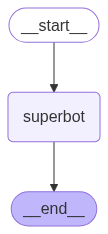

In [19]:
graph = StateGraph(State)

# node
graph.add_node("superbot", superbot)

# edges
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

# compile graph
graph_builder = graph.compile(checkpointer=memory)

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [20]:
## Invocation

config = {
    "configurable" : {"thread_id" : "1"}
}

graph_builder.invoke({"messages" : "Hi, My name is Mahadi Hasan and I like video game"}, config)

{'messages': [HumanMessage(content='Hi, My name is Mahadi Hasan and I like video game', additional_kwargs={}, response_metadata={}, id='06e75dd8-9d17-4389-834d-f57d4a96a3f1'),
  AIMessage(content="Nice to meet you, Mahadi Hasan! It's great to hear that you're into video games. What kind of games do you enjoy playing? Are you into action, adventure, role-playing, or something else? Do you have a favorite game or series that you always come back to?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 48, 'total_tokens': 108, 'completion_time': 0.33152637, 'prompt_time': 0.011491881, 'queue_time': 0.044885929, 'total_time': 0.343018251}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b322c766-b516-4ff6-a06d-fdff322698de-0', usage_metadata={'input_tokens': 48, 'output_tokens': 60, 'total_tokens': 108})]}

### Streaming in LangGraph allows for real-time updates and feedback from graph runs to a user's application.

Values vs Updates

In [21]:
config = {
    "configurable" : {"thread_id" : "2"}
}

for chunk in graph_builder.stream({"messages" : "Hi, My name is Mahadi Hasan and I like video game"}, config, stream_mode="updates"):
    print(chunk)


{'superbot': {'messages': [AIMessage(content="Nice to meet you, Mahadi Hasan! It's great to hear that you enjoy video games! What kind of video games do you like to play? Are you into action, adventure, role-playing, or something else? Do you have a favorite game or series that you always come back to?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 48, 'total_tokens': 109, 'completion_time': 0.164716751, 'prompt_time': 0.012683087, 'queue_time': 0.044857603, 'total_time': 0.177399838}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e859519-afba-49ee-9b08-665214436ba7-0', usage_metadata={'input_tokens': 48, 'output_tokens': 61, 'total_tokens': 109})]}}


In [22]:
config = {
    "configurable" : {"thread_id" : "2"}
}

for chunk in graph_builder.stream({"messages" : "Hi, My name is Mahadi Hasan and I like video game"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Mahadi Hasan and I like video game', additional_kwargs={}, response_metadata={}, id='81425472-86ef-40e6-a534-e3e7bbbbaa15'), AIMessage(content="Nice to meet you, Mahadi Hasan! It's great to hear that you enjoy video games! What kind of video games do you like to play? Are you into action, adventure, role-playing, or something else? Do you have a favorite game or series that you always come back to?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 48, 'total_tokens': 109, 'completion_time': 0.164716751, 'prompt_time': 0.012683087, 'queue_time': 0.044857603, 'total_time': 0.177399838}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e859519-afba-49ee-9b08-665214436ba7-0', usage_metadata={'input_tokens': 48, 'output_tokens': 61, 'total_tokens': 109}), HumanMessage(content='H

In [23]:
for chunk in graph_builder.stream({"messages" : "I also like football"}, config, stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="So you're a fan of both video games and football, Mahadi Hasan! That's a great combination. Do you have a favorite football team or player? And do you play football video games, such as FIFA or PES, or do you prefer other types of games?\n\nBy the way, are you more of a casual gamer or a competitive one? And do you watch football matches or play the sport with friends?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 193, 'total_tokens': 279, 'completion_time': 0.314077057, 'prompt_time': 0.032388832, 'queue_time': 0.044971457, 'total_time': 0.346465889}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f1bb1a75-5ba1-4780-bd80-635826476ed2-0', usage_metadata={'input_tokens': 193, 'output_tokens': 86, 'total_tokens': 279})]}}


In [27]:
from pprint import pprint

In [28]:
for chunk in graph_builder.stream({"messages" : "I also like gaming"}, config, stream_mode="values"):
    pprint(chunk)

{'messages': [HumanMessage(content='Hi, My name is Mahadi Hasan and I like video game', additional_kwargs={}, response_metadata={}, id='81425472-86ef-40e6-a534-e3e7bbbbaa15'),
              AIMessage(content="Nice to meet you, Mahadi Hasan! It's great to hear that you enjoy video games! What kind of video games do you like to play? Are you into action, adventure, role-playing, or something else? Do you have a favorite game or series that you always come back to?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 48, 'total_tokens': 109, 'completion_time': 0.164716751, 'prompt_time': 0.012683087, 'queue_time': 0.044857603, 'total_time': 0.177399838}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e859519-afba-49ee-9b08-665214436ba7-0', usage_metadata={'input_tokens': 48, 'output_tokens': 61, 'total_tokens': 109}),
         

### astream method

In [31]:
config = {
    "configurable" : {"thread_id" : "3"}
}

async for even in graph_builder.astream_events({"messages" : "Hi, My name is Mahadi Hasan and i like video games"}, config, version = "v2"):
    print(even)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi, My name is Mahadi Hasan and i like video games'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '4750c7c5-2501-437c-bf69-be1790d7c1a1', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Mahadi Hasan and i like video games', additional_kwargs={}, response_metadata={}, id='fbd080af-779c-42b9-b472-24a0ae51d1ea')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': '5522f611-643a-4c26-8c6e-d9937f626e8c', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:b49f44a0-beda-8f7d-9891-324bf756d1e3'}, 'parent_ids': ['4750c7c5-2501-437c-bf69-be1790d7c1a1']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, My name is Mahadi Hasan and